In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
base_dir = 'dataset'

train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [4]:
classes = list(train_generator.class_indices.keys())

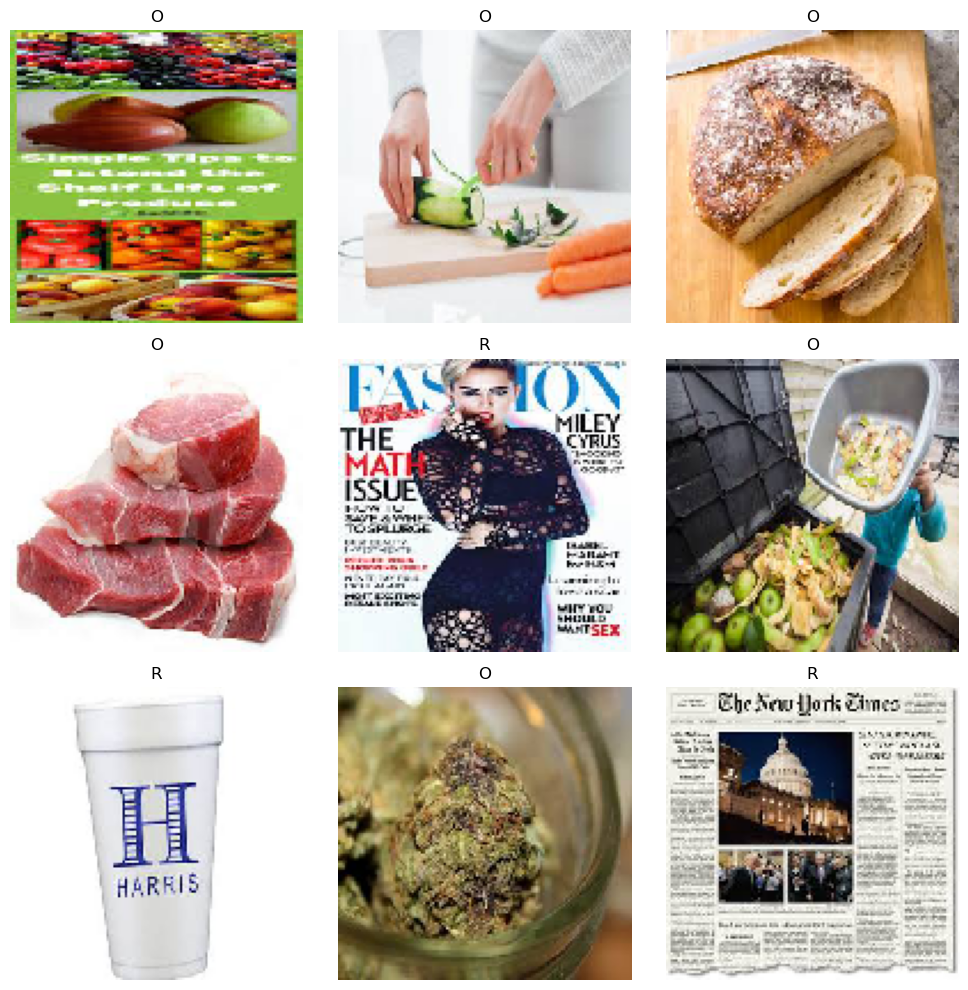

In [5]:
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=5)

Epoch 1/5


706/706 [==============================] - 387s 546ms/step - loss: 0.4319 - accuracy: 0.8142 - val_loss: 0.2957 - val_accuracy: 0.8906
Epoch 2/5
706/706 [==============================] - 159s 225ms/step - loss: 0.3696 - accuracy: 0.8477 - val_loss: 0.2840 - val_accuracy: 0.8862
Epoch 3/5
706/706 [==============================] - 108s 153ms/step - loss: 0.3363 - accuracy: 0.8614 - val_loss: 0.2913 - val_accuracy: 0.8822
Epoch 4/5
706/706 [==============================] - 106s 150ms/step - loss: 0.3124 - accuracy: 0.8740 - val_loss: 0.2565 - val_accuracy: 0.9073
Epoch 5/5
706/706 [==============================] - 104s 147ms/step - loss: 0.2857 - accuracy: 0.8850 - val_loss: 0.2383 - val_accuracy: 0.9148


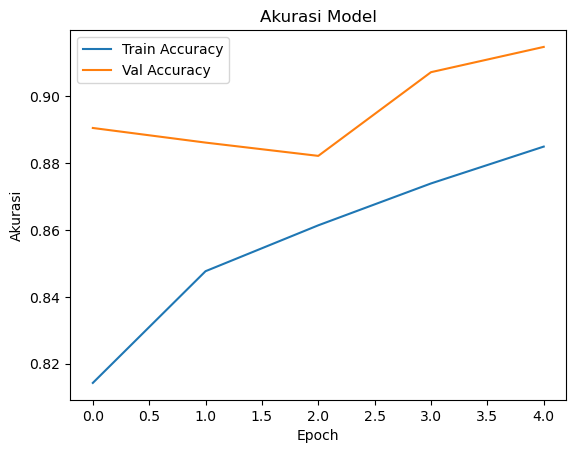

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.show()


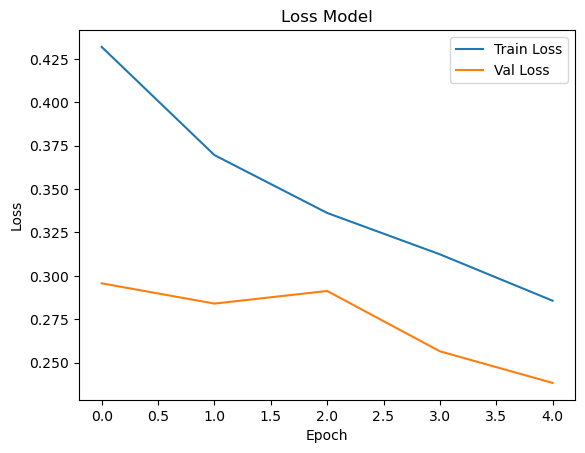

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
y_pred = model.predict(test_generator)
y_pred_labels = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_labels, target_names=classes))

79/79 [==============================] - 29s 361ms/step
              precision    recall  f1-score   support

           O       0.88      0.97      0.93      1401
           R       0.96      0.84      0.90      1112

    accuracy                           0.91      2513
   macro avg       0.92      0.91      0.91      2513
weighted avg       0.92      0.91      0.91      2513

